In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

In [28]:
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, facecolor='white')

#read file
adata = sc.read_10x_h5(r"C:\Users\victo\Desktop\40k_NSCLC_DTC_3p_HT_nextgem_Multiplex_count_raw_feature_bc_matrix.h5")
adata.var_names_make_unique()

adata

reading C:\Users\victo\Desktop\40k_NSCLC_DTC_3p_HT_nextgem_Multiplex_count_raw_feature_bc_matrix.h5
 (0:00:06)


AnnData object with n_obs × n_vars = 4387768 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

normalizing counts per cell


C:\Users\victo\anaconda3\lib\site-packages\scanpy\preprocessing\_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


    finished (0:00:00)


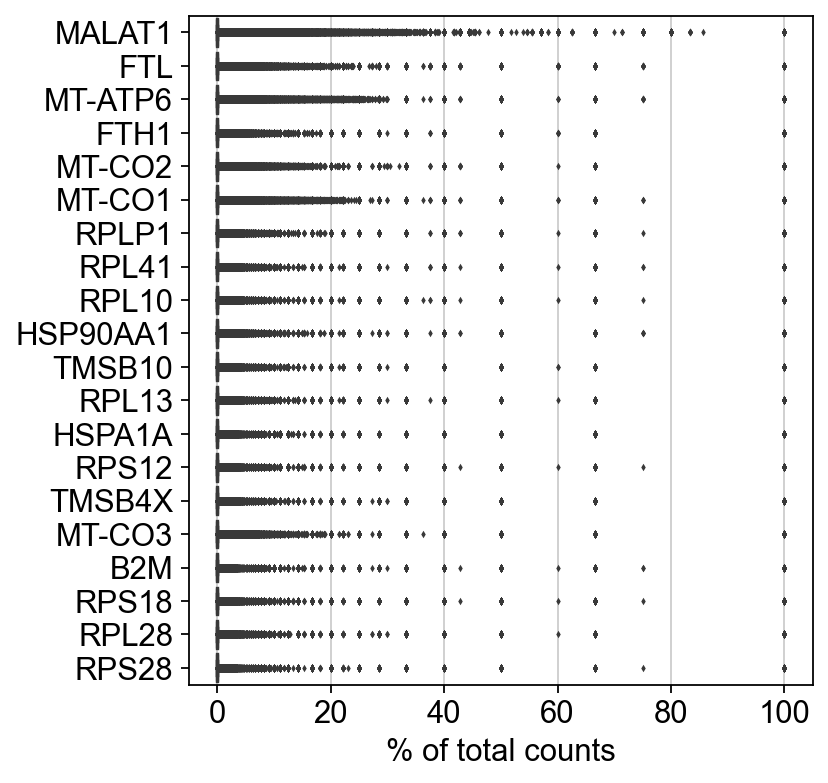

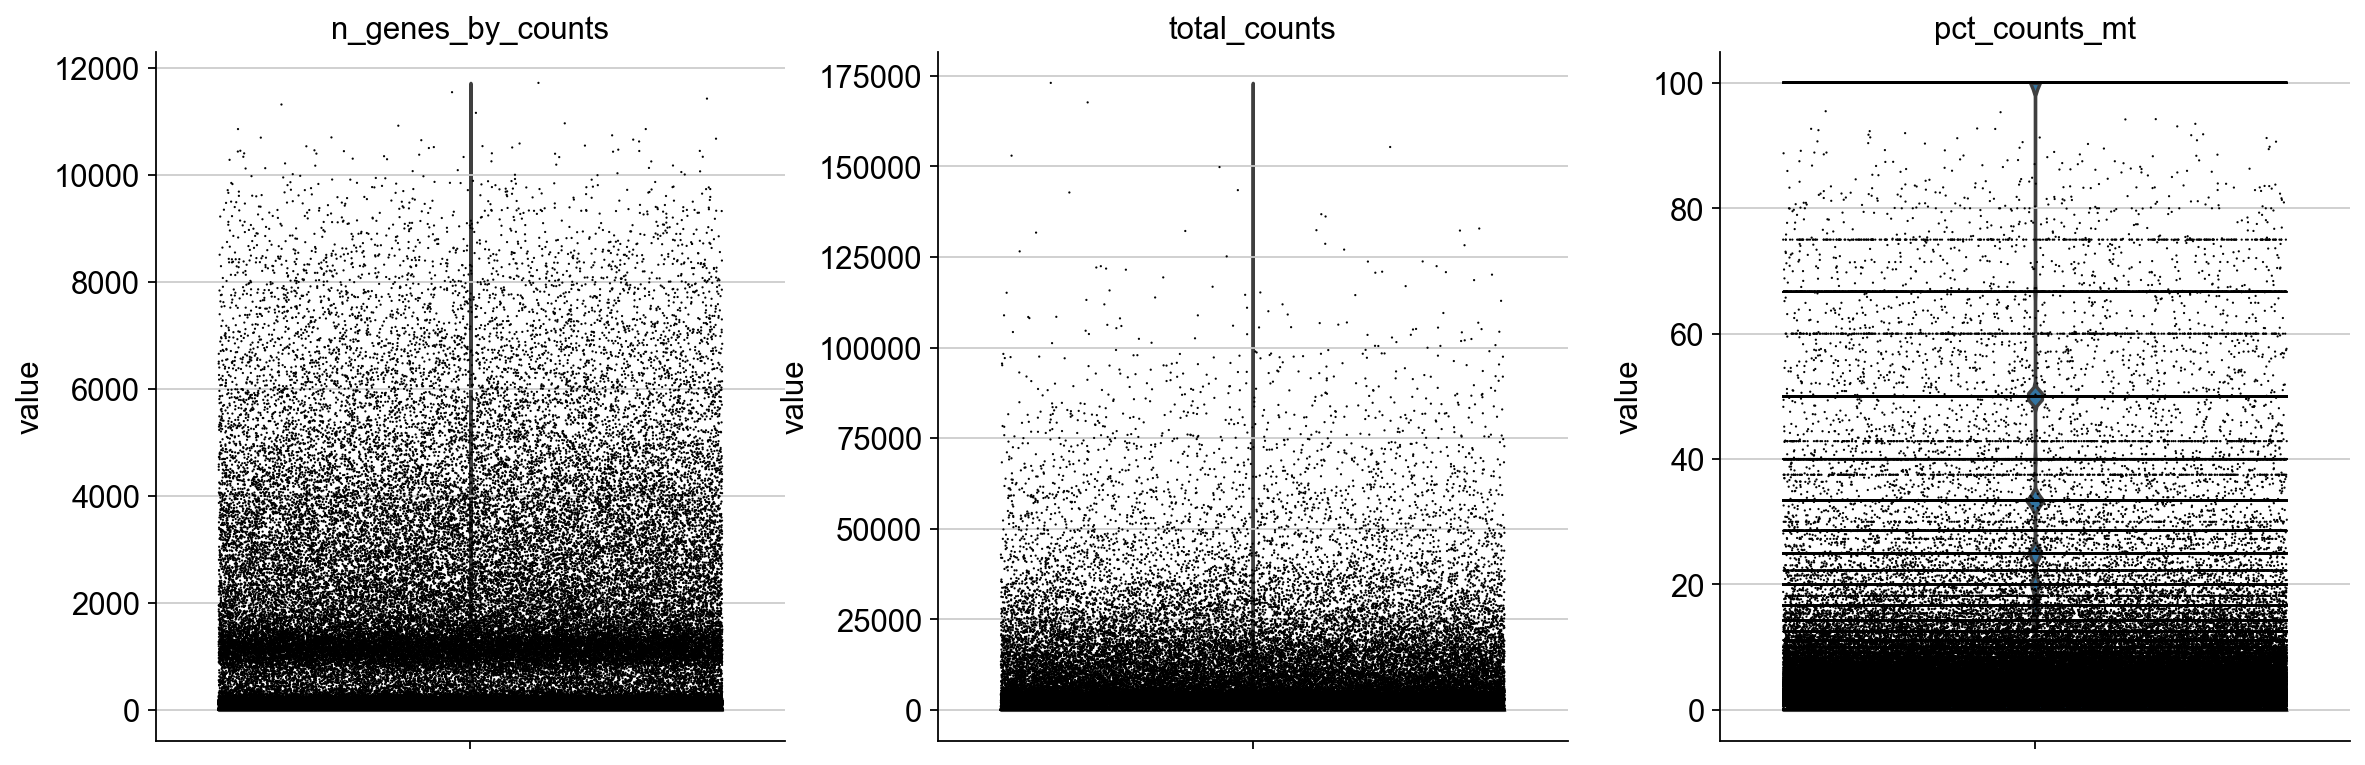

In [30]:
#before filtering
#show genes that yield highest fraction of counts
sc.pl.highest_expr_genes(adata, n_top=20, )

#quality matrix
#The reasoning to use mitochondria protein as quality control is that mitochondria are larger than individual 
#transcript molecules and less likely to escape through tears in the cell membrane.
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

filtered out 2579 genes that are detected in less than 50 cells
normalizing counts per cell
    finished (0:00:00)


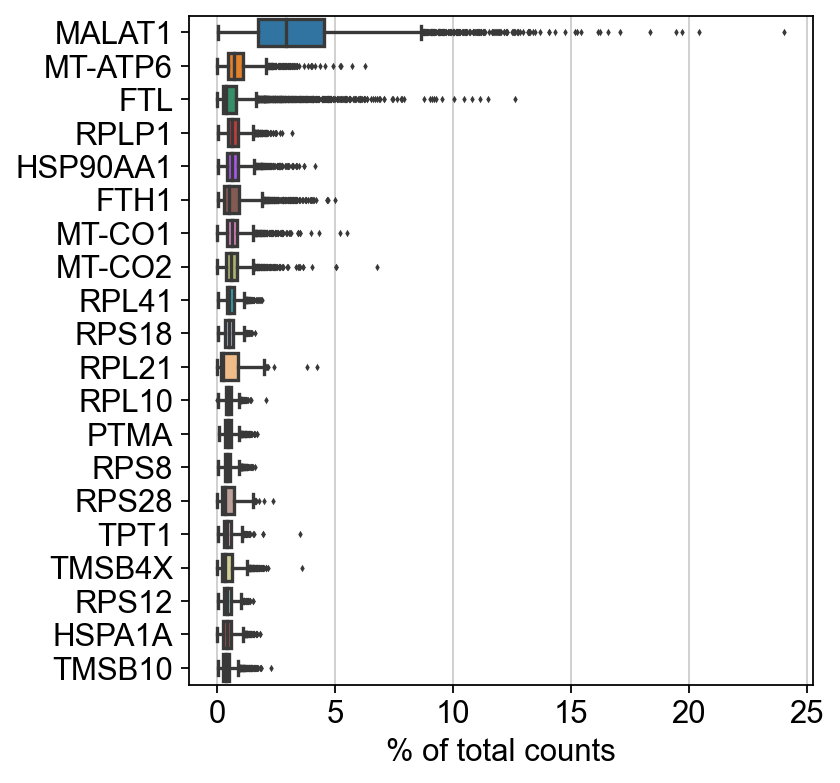

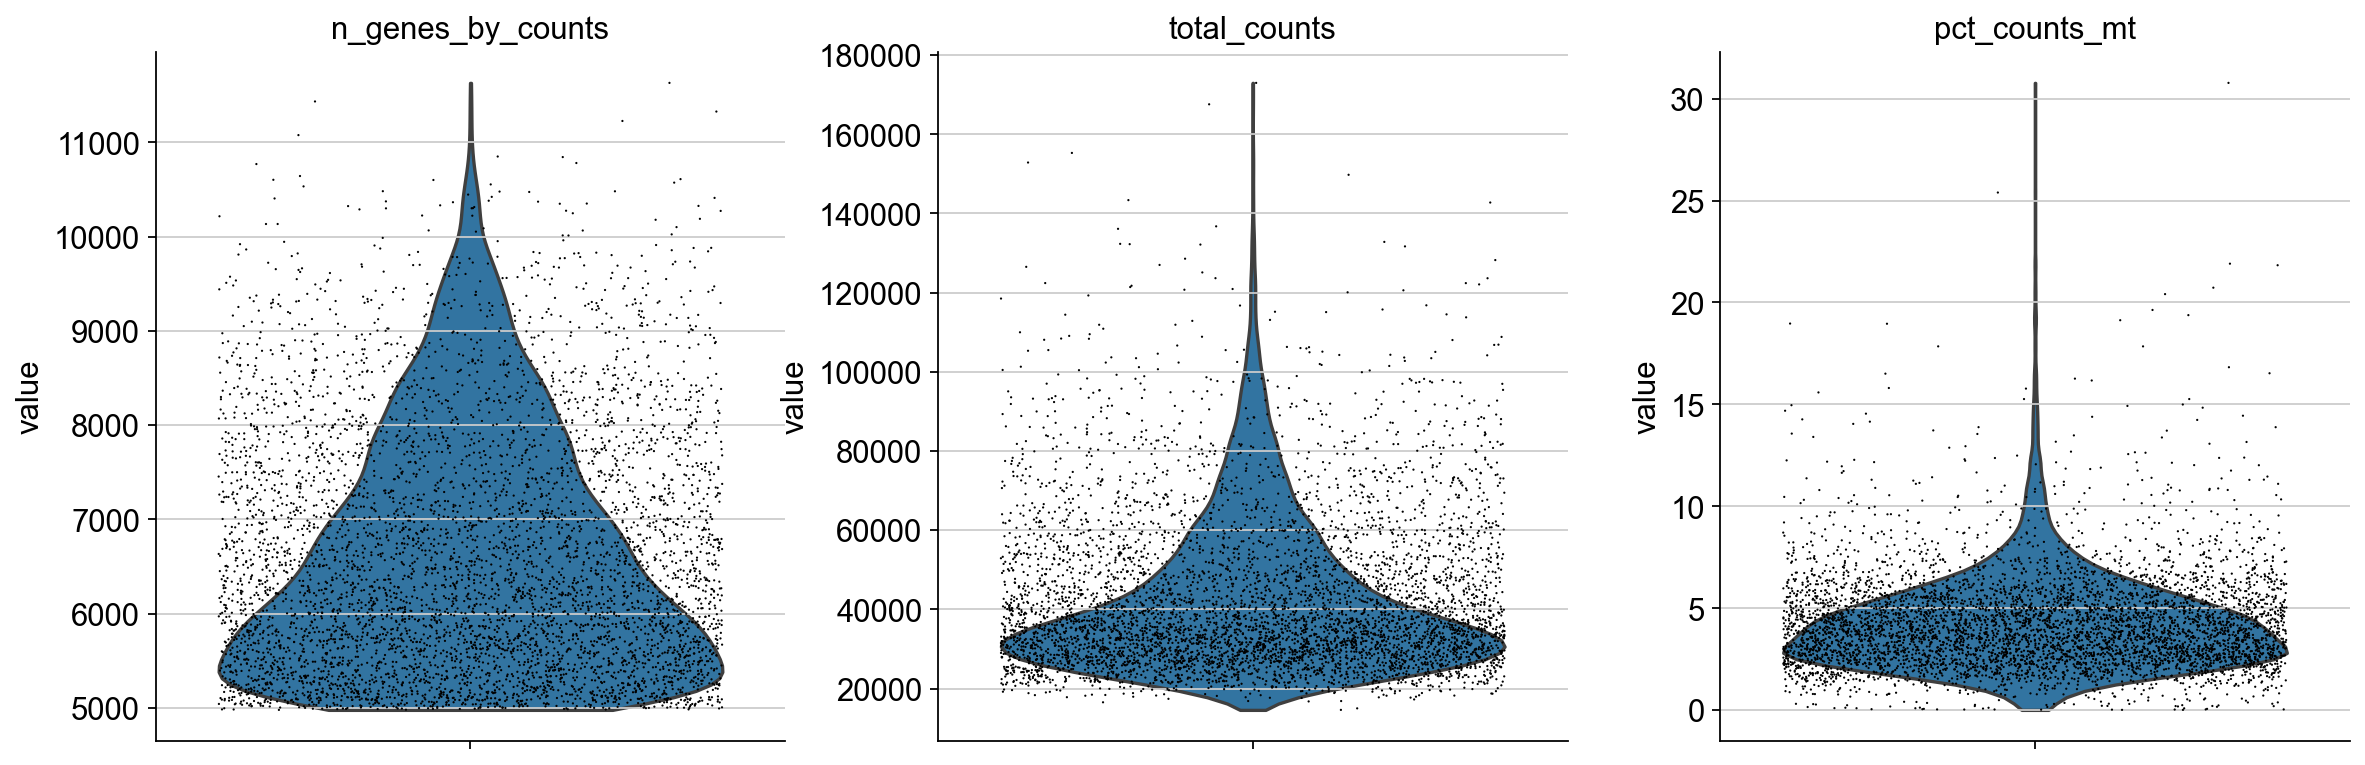

In [48]:
#filtering
sc.pp.filter_cells(adata, min_genes=5000)
sc.pp.filter_genes(adata, min_cells=50)
#after filtering 
#show genes that yield highest fraction of counts
sc.pl.highest_expr_genes(adata, n_top=20, )

#quality matrix
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)